In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

### Task 1: Dataset Exploration

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
features = diabetes.feature_names

df = pd.DataFrame(X, columns=features)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Task 2: Linear Regression Model

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  
)


In [4]:
# Train a linear regression model
basic_model = LinearRegression()
basic_model.fit(X_train, y_train)

# Evaluate model on test set
test_r2 = r2_score(y_test, basic_model.predict(X_test))
print(f'\nBasic model R2: {test_r2:.4f}')


Basic model R2: 0.4526


### Task 3: Implement Recursive Feature Elimination (RFE)

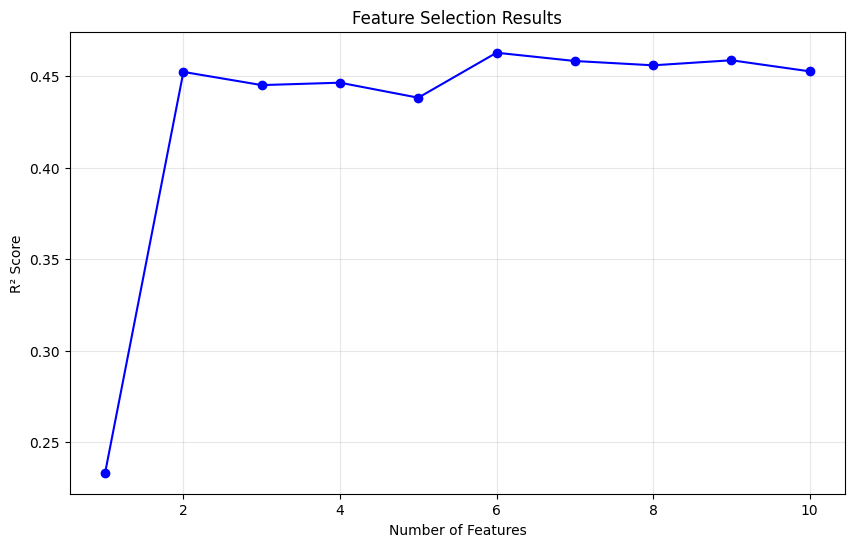

In [5]:
# Perform Recursive Feature Elimination (RFE)
r2_list = []  
n_features = []

# Track R² scores and feature rankings
for n in range(1, len(features) + 1):
    rfe_model = RFE(
        estimator=LinearRegression(),
        n_features_to_select=n
    )
    
    rfe_model.fit(X_train, y_train)
    preds = rfe_model.predict(X_test)
    r2 = r2_score(y_test, preds)
    r2_list.append(r2)
    n_features.append(n)

# Visualize R² score vs. number of retained features
plt.figure(figsize=(10,6))
plt.plot(n_features, r2_list, 'bo-')  
plt.grid(True, alpha=0.3)
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.title('Feature Selection Results')
plt.show()


In [6]:
# Determine the optimal number of features (based on R² improvement)
best_n_features = n_features[np.argmax(r2_list)]
print(f'\nOptimal number of features: {best_n_features}')


Optimal number of features: 6


### Task 4: Analyze Feature Importance

In [7]:
# Feature ranking
final_rfe = RFE(
    estimator=LinearRegression(),
    n_features_to_select=1
)
final_rfe.fit(X_train, y_train)

rankings = pd.DataFrame({
    'Feature': features,
    'Rank': final_rfe.ranking_
})
rankings = rankings.sort_values('Rank')

print('\nFeature Rankings:')
print(rankings)


Feature Rankings:
  Feature  Rank
2     bmi     1
8      s5     2
4      s1     3
5      s2     4
3      bp     5
1     sex     6
7      s4     7
6      s3     8
9      s6     9
0     age    10


### Task 5: Reflection

1. What did you learn about feature selection using RFE?

    Recursive Feature Elimination (RFE) systematically removes less important features to improve model performance and interpretability. It helps in identifying the most influential variables, reducing overfitting and improving model generalization.

2. How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?

    Unlike LASSO, which applies L1 regularization to shrink coefficients to zero, RFE iteratively removes the weakest features based on model performance. 

3. What insights can you draw about the dataset from the selected features?

    The most important features identified by RFE suggest which factors have the strongest influence on diabetes progression. For example, if BMI or blood pressure ranks highly, it reinforces their known medical significance. 